In [1]:
import pandas as pd
from torch.utils.data import DataLoader
import pytorch_lightning as pl
#from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import HeatfluxData as hfd
import HeatfluxModel as hfm

/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename_data = f'scaled_QdataKn21width100microns.csv'
# NOTE: if the filename_data does not exist generate it by `python3 generate_QimpactTrainingData.py 100 0.01 0.2 40000 105`
# Using heat flux data module
scaled_Qdata = pd.read_csv(filename_data, header=0, index_col=0)
dropouts = ['x']; Nfields = 6 - len(dropouts) # T, gradT, Z, n, Kn, x
test_split = 0.5
train_split = 0.8
test_set, train_set, validation_set, vis_set = hfd.heat_flux_datasets(scaled_Qdata, test_split, train_split, dropouts)

Dropping x_0
Dropping x_1
Dropping x_2
Dropping x_3
Dropping x_4
Dropping x_5
Dropping x_6
Dropping x_7
Dropping x_8
Dropping x_9
Dropping x_10
Dropping x_11
Dropping x_12
Dropping x_13
Dropping x_14
Dropping x_15
Dropping x_16
Dropping x_17
Dropping x_18
Dropping x_19
Dropping x_20


In [3]:
### Create data loaders
train_loader = DataLoader(dataset = train_set, batch_size = 128)
validation_loader = DataLoader(dataset = validation_set, batch_size = 128)
test_loader = DataLoader(dataset = test_set, batch_size = 128)
# Special object for visualization
vis_loader = DataLoader(dataset = vis_set, batch_size = 128)

In [4]:
### Read data sacling (generated by the data manager)
data_scaling=pd.read_csv(f'data_scaling.csv', header=0, index_col=0)

In [5]:
#### Create the heat flux model
Nfeatures = train_set[0][0].size()[0]# TODO: find a better way than extracting the size via Tensor
print(f'Nfeatures {Nfeatures}')
Nlayer1 = 20
Nlayer2 = 10
model = hfm.DirectModel(Nfeatures, Nlayer1, Nlayer2, data_scaling, Nfields)

Nfeatures 105


In [6]:
### Let's train the beast!
trainer = pl.Trainer(max_epochs = 50)
trainer.fit(model, train_loader, validation_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type    | Params
-------------------------------------
0 | fc1      | Linear  | 2.1 K 
1 | fc2      | Linear  | 210   
2 | fc3      | Linear  | 11    
3 | mse_loss | MSELoss | 0     
-------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|███████████████████▏    | 119/149 [00:00<00:00, 166.37it/s, loss=0.0686, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|███████████████████▏    | 119/149 [00:00<00:00, 179.80it/s, loss=0.0432, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 2:  80%|███████████████████▉     | 119/149 [00:00<00:00, 178.55it/s, loss=0.027, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 2:  87%|█████████████████████▊   | 130/149 [00:00<00:00, 180.59it/s, loss=0.027, v_num=97]


Epoch 3:  80%|███████████████████▏    | 119/149 [00:00<00:00, 163.75it/s, loss=0.0152, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 4:  80%|██████████████████▎    | 119/149 [00:00<00:00, 174.62it/s, loss=0.00994, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 4:  97%|██████████████████████▍| 145/149 [00:00<00:00, 185.71it/s, loss=0.00994, v_num=97]


Epoch 5:  80%|██████████████████▎    | 119/149 [00:00<00:00, 175.26it/s, loss=0.00708, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 6:  80%|██████████████████▎    | 119/149 [00:00<00:00, 173.12it/s, loss=0.00522, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 7:  80%|██████████████████▎    | 119/149 [00:00<00:00, 174.14it/s, loss=0.00396, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 7:  85%|███████████████████▍   | 126/149 [00:00<00:00, 176.19it/s, loss=0.00396, v_num=97]


Epoch 8:  80%|██████████████████▎    | 119/149 [00:00<00:00, 180.70it/s, loss=0.00304, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 9:  80%|██████████████████▎    | 119/149 [00:00<00:00, 179.77it/s, loss=0.00238, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 9:  95%|█████████████████████▊ | 141/149 [00:00<00:00, 189.26it/s, loss=0.00238, v_num=97]


Epoch 10:  80%|█████████████████▌    | 119/149 [00:00<00:00, 181.47it/s, loss=0.00188, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 11:  80%|█████████████████▌    | 119/149 [00:00<00:00, 181.44it/s, loss=0.00151, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 12:  80%|█████████████████▌    | 119/149 [00:00<00:00, 181.52it/s, loss=0.00123, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 12:  82%|██████████████████    | 122/149 [00:00<00:00, 181.66it/s, loss=0.00123, v_num=97]


Epoch 13:  80%|█████████████████▌    | 119/149 [00:00<00:00, 177.69it/s, loss=0.00103, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 14:  80%|████████████████▊    | 119/149 [00:00<00:00, 174.96it/s, loss=0.000885, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 14:  92%|███████████████████▎ | 137/149 [00:00<00:00, 179.93it/s, loss=0.000885, v_num=97]


Epoch 15:  80%|████████████████▊    | 119/149 [00:00<00:00, 179.14it/s, loss=0.000771, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 16:  80%|█████████████████▌    | 119/149 [00:00<00:00, 179.99it/s, loss=0.00068, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 17:  80%|████████████████▊    | 119/149 [00:00<00:00, 177.36it/s, loss=0.000609, v_num=97]
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                        | 0/30 [00:00<?, ?it/s]


Epoch 18:  80%|█████████████████▌    | 119/149 [00:00<00:00, 180.37it/s, loss=0.00055, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 19:  80%|████████████████▊    | 119/149 [00:00<00:00, 175.82it/s, loss=0.000504, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 19:  89%|██████████████████▋  | 133/149 [00:00<00:00, 180.71it/s, loss=0.000504, v_num=97]


Epoch 20:  80%|████████████████▊    | 119/149 [00:00<00:00, 181.39it/s, loss=0.000469, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 21:  80%|████████████████▊    | 119/149 [00:00<00:00, 179.28it/s, loss=0.000437, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 21:  99%|████████████████████▊| 148/149 [00:00<00:00, 188.49it/s, loss=0.000437, v_num=97]


Epoch 22:  80%|████████████████▊    | 119/149 [00:00<00:00, 174.10it/s, loss=0.000406, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 23:  80%|████████████████▊    | 119/149 [00:00<00:00, 176.91it/s, loss=0.000379, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 24:  80%|████████████████▊    | 119/149 [00:00<00:00, 182.98it/s, loss=0.000354, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 24:  87%|██████████████████▏  | 129/149 [00:00<00:00, 187.02it/s, loss=0.000354, v_num=97]


Epoch 25:  80%|████████████████▊    | 119/149 [00:00<00:00, 180.95it/s, loss=0.000334, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 26:  80%|████████████████▊    | 119/149 [00:00<00:00, 177.61it/s, loss=0.000309, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 26:  97%|████████████████████▎| 144/149 [00:00<00:00, 186.46it/s, loss=0.000309, v_num=97]


Epoch 27:  80%|████████████████▊    | 119/149 [00:00<00:00, 176.50it/s, loss=0.000291, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 28:  80%|█████████████████▌    | 119/149 [00:00<00:00, 179.65it/s, loss=0.00027, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 29:  80%|█████████████████▌    | 119/149 [00:00<00:00, 180.49it/s, loss=0.00025, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 29:  84%|██████████████████▍   | 125/149 [00:00<00:00, 181.80it/s, loss=0.00025, v_num=97]


Epoch 30:  80%|████████████████▊    | 119/149 [00:00<00:00, 181.69it/s, loss=0.000234, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 31:  80%|████████████████▊    | 119/149 [00:00<00:00, 183.36it/s, loss=0.000219, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 31:  94%|███████████████████▋ | 140/149 [00:00<00:00, 191.75it/s, loss=0.000219, v_num=97]


Epoch 32:  80%|████████████████▊    | 119/149 [00:00<00:00, 179.22it/s, loss=0.000207, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 33:  80%|████████████████▊    | 119/149 [00:00<00:00, 177.61it/s, loss=0.000197, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 34:  80%|████████████████▊    | 119/149 [00:00<00:00, 180.54it/s, loss=0.000187, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 34:  81%|█████████████████    | 121/149 [00:00<00:00, 180.24it/s, loss=0.000187, v_num=97]


Epoch 35:  80%|████████████████▊    | 119/149 [00:00<00:00, 183.51it/s, loss=0.000179, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 36:  80%|████████████████▊    | 119/149 [00:00<00:00, 180.76it/s, loss=0.000172, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 36:  91%|███████████████████▏ | 136/149 [00:00<00:00, 186.96it/s, loss=0.000172, v_num=97]


Epoch 37:  80%|████████████████▊    | 119/149 [00:00<00:00, 181.40it/s, loss=0.000166, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 38:  80%|█████████████████▌    | 119/149 [00:00<00:00, 180.68it/s, loss=0.00016, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 39:  80%|████████████████▊    | 119/149 [00:00<00:00, 181.12it/s, loss=0.000155, v_num=97]
Validation: 0it [00:00, ?it/s]


Epoch 40:  80%|█████████████████▌    | 119/149 [00:00<00:00, 177.58it/s, loss=0.00015, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 41:  80%|████████████████▊    | 119/149 [00:00<00:00, 182.40it/s, loss=0.000146, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 41:  89%|██████████████████▌  | 132/149 [00:00<00:00, 187.16it/s, loss=0.000146, v_num=97]


Epoch 42:  80%|████████████████▊    | 119/149 [00:00<00:00, 177.74it/s, loss=0.000142, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 43:  80%|████████████████▊    | 119/149 [00:00<00:00, 177.98it/s, loss=0.000138, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 43:  99%|████████████████████▋| 147/149 [00:00<00:00, 184.14it/s, loss=0.000138, v_num=97]


Epoch 44:  80%|████████████████▊    | 119/149 [00:00<00:00, 176.30it/s, loss=0.000134, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 45:  80%|████████████████▊    | 119/149 [00:00<00:00, 175.37it/s, loss=0.000131, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 46:  80%|████████████████▊    | 119/149 [00:00<00:00, 181.32it/s, loss=0.000128, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 46:  86%|██████████████████   | 128/149 [00:00<00:00, 183.91it/s, loss=0.000128, v_num=97]


Epoch 47:  80%|████████████████▊    | 119/149 [00:00<00:00, 180.00it/s, loss=0.000125, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 48:  80%|████████████████▊    | 119/149 [00:00<00:00, 174.96it/s, loss=0.000123, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 48:  96%|████████████████████▏| 143/149 [00:00<00:00, 183.45it/s, loss=0.000123, v_num=97]


Epoch 49:  80%|█████████████████▌    | 119/149 [00:00<00:00, 177.74it/s, loss=0.00012, v_num=97]
Validation: 0it [00:00, ?it/s]
Epoch 49: 100%|██████████████████████| 149/149 [00:00<00:00, 187.04it/s, loss=0.00012, v_num=97]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████████████████| 149/149 [00:00<00:00, 186.21it/s, loss=0.00012, v_num=97]


In [7]:
### Test the beast
# Get model prediction of heat flux values from visualization data set vis_set
values_prediction = model.heatflux_model(vis_set[:][0])
# Convert to numpy ndarray
values_prediction = values_prediction.detach().numpy()

In [8]:
# Add local flux evaluation
values_local = model.local_heatflux_model(vis_set[:][0])
values_local = values_local.detach().numpy()

In [9]:
# Get actual heat flux values from data using back scaling
mean = data_scaling['Q']['mean']
std = data_scaling['Q']['std']
values_actual = vis_set[:][1] * std + mean
# Convert to numpy ndarray
values_actual = values_actual.detach().numpy()

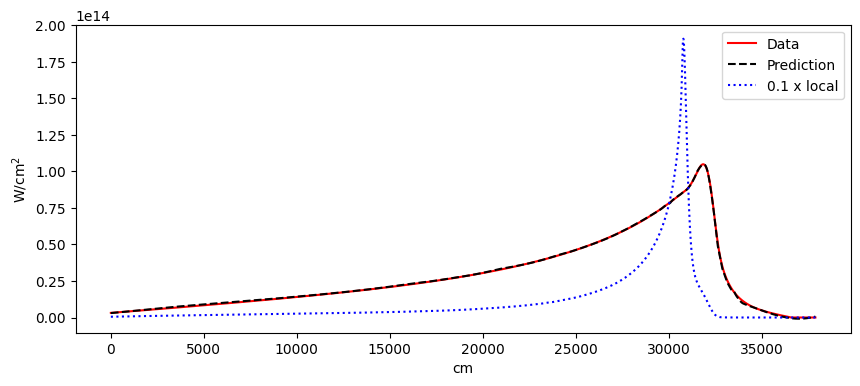

In [10]:
from matplotlib import pyplot as plt
# And finally we can see that our network has done a decent job of estimating!
fig1, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(values_actual, 'r', label='Data')
ax1.plot(values_prediction, 'k--', label='Prediction')
ax1.plot(0.1 * values_local, 'b:', label='0.1 x local')
ax1.set_xlabel('cm')
ax1.set_ylabel('W/cm$^2$')
ax1.legend()